# Titanic Dataset

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#lading data

data = pd.read_csv(r'C:\Users\Administrator\Desktop\DATA\Python Test Data\titanic.csv')
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
#information

data.info()
print('\n')
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


(887, 8)


In [4]:
data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [5]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


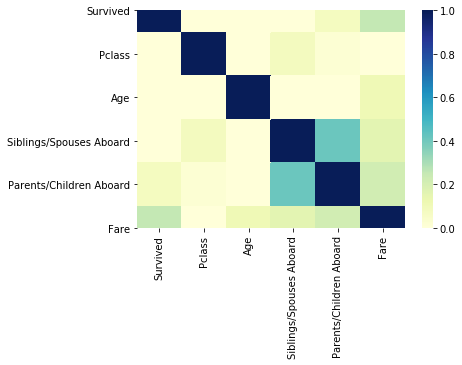

In [6]:
correlation = data.corr()

ax = sns.heatmap( correlation , vmin=0, vmax = 1, cmap = 'YlGnBu' , cbar = True)

In [7]:
#grouping by

group = data.groupby('Survived')
group.mean()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,,,,,
0,2.528440,30.138532,0.557798,0.332110,22.208584
1,1.950292,28.408392,0.473684,0.464912,48.395408


In [8]:
#creating dummy variable
gender = pd.get_dummies(data['Sex'])

df = pd.concat([data , gender], axis = 1)
df.drop(['Sex' , 'Name'], axis = 1, inplace = True)

In [9]:
# seperating the values for prediction

y = df.loc[: , 'Survived'].values

X = df.loc[: , 'Pclass':'male'].values

In [10]:
# model building

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#metrics
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acc

In [11]:
#data preparation
X_train , X_test , y_train , y_test = train_test_split(*shuffle(X ,y) ,test_size = 0.2)

[[96 18]
 [22 42]]




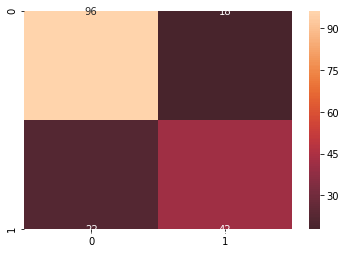

In [26]:
#model1

logreg = LogisticRegression( solver = 'saga',max_iter=10000)
logreg.fit(X_train , y_train)

y_linear_preds = logreg.predict(X_test)

cm1 = cm( y_test , y_linear_preds)

acc1 = acc(y_test, y_linear_preds)

#model2

dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_train , y_train)

y_tree_preds = dtree.predict(X_test)

cm2 = cm( y_test , y_tree_preds)

acc2 = acc(y_test , y_linear_preds)

# confusion matrices

print(cm1)
print('\n')
ax1 = sns.heatmap( cm1 , center = 0 ,  annot = True)



In [31]:
#predicting probabilities
logreg_probabs = logreg.predict_proba(X_test)

[[102  12]
 [ 21  43]]




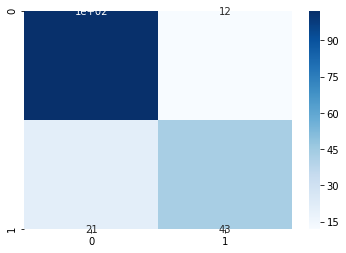

In [24]:
print(cm2)
print('\n')
ax2 = sns.heatmap(cm2 , annot  = True , cmap  = 'Blues')


In [13]:
print('Accuracy for first:{:.2%}'.format(acc1))
print('Accuracy for second :{:.2%}'.format(acc2))

Accuracy for first:77.53%
Accuracy for second :77.53%
